<h7>
Jeff Becker # 200182924 <br>
U of L Goldsmiths <br>
BSc <br>
CM2015 Programming With Data<br>
Midterm Assignment Fall 2022<br>

</h7>
<br>
<br>


<h1> Negative Bias in Online Media Organtization Headlines. </h1>


**Thesis:**
Do online media organizations have an overall negative bias in the presentation of content to consumers? That is the question that this research will attempt to answer.  I will examine news headlines  and attempt to determine if there is an overall bias towards negative content. 

There are various theories as to why a media organization would exhibit negative bias. Those reasons may include an intentional attempt to encourage engagement by displaying salacious or scandalous content(“clickbait”), unconscious bias towards negativity, political and socially motivated activism, over emphasis on content which is inherently negative, or that newsworthy stories tend to be more negative than positive. The reasons why this occurs are beyond the scope of this project. Rather, I will ask the question: Is there a tendency for a negative bias in media reporting and attempt to answer that question with scraped data from contemporary online media organizations.

**Background:**
There are a multitude of  reasons for the psychological, sociological and physiological motivators regarding a preference for consuming more negative content rather than neutral or positive content. Some theories include the evolutionary component of human survival mechanisms. According to Soroka, Fournier, and Nir a human’s vigilance and attention to potentially threatening elements is neurologically “hardwired (Soroka et al.).

There also may be differences based on environmental factors such as culture, religion, political paradigms, etc. Soroka, Fournier, and Nir’s study, in which they examined people’s psychophysiological reactions to video news content in 17 countries revealed that, globally, humans are more aroused by and attentive to negative news on average (Soroka et al.).

**Abstract:**
The reasons for media bias have been extensively studied. These studies involve large data sets, self reporting of respondents and samples of content. The scope of these studies and their implications is vast. This project is not an explainer for sociological or psychological phenomena regarding negative media bias. Rather, this is a small scale, limited research project only to demonstrate that contemporary media organizations do in fact have an overall negative bias in their reporting.

Why is negative bias of concern? There is research demonstrating that consumption of negative media can have negative health consequences (Kathirvel). Therefore, the study of negative bias in the media is a valid public health concern. There is already a significant mental health decline in the post COVID 19 pandemic world (Lindberg). It is important to consider how media reporting affects mental health and how media reporting continues to inform overall sentiment, attitudes and outlook among world citizens.


**Methodology:**
Bias has a number of definitions, however, for the purpose of this research I will adhere to this definition: cause to feel or show inclination or prejudice for or against someone or something. In this instance the inclination is towards negativity. Negativity can be defined a variety of ways but, in the context of sentiment, negativity is pessimism, skepticism and disagreeableness.

It is important that the tools used to score negativity should match the overall definition of negativity. The tools used in this instance is from the Python NLTK library : VADER - Valence Aware Dictionary for sEntiment Reasoning.

Why VADER? VADER has shown good performance with classification accuracy (F1 scores) and in some instances can outperform more sophisticated sentiment analysis tools and even human beings (Hutto and Gilbert).  Additionally VADER does not require training data like some other classifiers which saves time and resources for equally valid results.

Additionally, I’ll use the Textblob library to score subjectivity. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.  While this does not necessarily correlate to negative bias, it can inform the level of personal opinion injected into the statement which can be then compared to the relative level of negative bias. 


The data will be scraped from media organizations websites. Because of limitations on the amount of data, the scraped data will be the headlines only. Since headlines are intended to encourage engagement, I believe that the headline is a fair indicator of the overall sentiment of the content of the article.

Many headline data uses HTML tags of h1, h2, h3, etc. Because it’s not possible to know without inspecting the div tags of the website, it is an evaluation that has to be made by the researcher. For instance, the website CNN uses class id div tags which can be difficult to scrape without making custom Xpath queries. Creating a special scraper for one site that does not work on other sites may capture data inconsistently. For that reason I will limit the scope to sites that can be scraped for headlines using h1 tags.

I will attempt to keep an even distribution of the types of news sites, based on reputation, so that the types of political and social bias is not focused in one direction. For example, Fox News is notoriously conservative whereas the Guardian US is often regarded as left leaning. I will scrape both of these sites to create a balanced approach. Other sites explored will be the NY Post, the New York Times, the Daily Mail, BBC, along with two of my local news sites, KPTV and Oregonlive. There may be some stylistic variation between traditional news sites and tabloid style news. The Daily Mail is known to have tabloid style reporting whereas the New York Times is known for traditional, in-depth reporting. Based on these distinctions, I'll attempt to answer the question of: is there a difference in the negativity based on the style of reporting? 

Each of these scraped sites will receive their own discrete data set which will be labeled and worked with until the conclusion. The raw scrape will be preserved so that it can be reviewed with other sentiment analyzers to compare the accuracy of the results at a later date, should one choose to do so.

At the end of the document I’ll offer a ranking of which news organizations exhibited the most negative bias based on the above methodology.

**Limitations:**
As stated, the scraper that I have developed only scrapes HTML “h” tags. It is possible that news organizations websites that were not scraped could exhibit less, equal or more bias. My selection of news organizations to scrape is not scientific and may be subject to my own personal bias. The depth and breadth of the project is limited and relies on the operator to select the appropriate website. 

Punctuation and digits are eliminated with regex expressions. This may have implications for sentiment analysis. VADER is trained to score punctuation, capitalization and emojis. However when analyzing headlines, emojis are seldom used and punctuation is often skipped due to the style of headline writing. Case is retained for sentiment scoring but not the frequency plots. 

The data scraped is lemmatized, not stemmed at the tokenization step. The Porter, Snowball and Lancaster stemmers created too many useless words. For a large machine learning dataset, generalized data is appropriate. For the limited amount of data for this project, and where I am not creating a training and testing data set, that level of stemming is not needed. 

The words are lemmatized at the token phase where frequency plots are drawn, not when the sentiment is scored. It is unknown how that may affect the results, 

Some words become single characters when lemmatized. For instance “NFL” becomes “n” “f” and “l”. Those words are eliminated for the frequency plots as they have no value for visualizations. 

News headlines are updated frequently and may change by the minute. No conclusions should be drawn about the overall bias of a particular media organization based on the analysis of one scrape.  


In [ ]:
# Python program to scrape heading tags Jeff Becker 1/2023 V.1

import pickle
from IPython import display
import math
from pprint import pprint
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import os
import spacy
from textblob import TextBlob
from pattern.en import sentiment
import urllib3 
import re
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

nlp = spacy.load('en_core_web_sm')
%matplotlib inline
sns.set(style='darkgrid', context='notebook', font_scale=1.5, palette='Dark2')

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"} 
#find what headers you are sending here: https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending

input_url = input("Enter the full URL to scrape: ") #user inputs URL to scrape
utc_datetime = datetime.datetime.utcnow() #utc data concatenated with sliced URL name, filename stored
date_string = utc_datetime.strftime("%Y-%m-%d-%H%M_UTC") 
filename = f'{input_url[12:len(date_string)]}_{date_string}'


cleanData = []
tag_words = []
regex = re.compile('[^a-zA-Z]')

def scrape(url_link):
    # create a list by type of heading tags
    # the user will have to determine what "h" tags are valid for given URL
    heading_tags = ["h1","h2","h3","h4"] 
    request = requests.get(url_link, headers = headers)
    Soup = BeautifulSoup(request.text, 'lxml') #create soup obejct

    if request.status_code == 200: #error handling for URL request
        print('Request successful.')
    elif request.status_code == 404:
        print('Error 404: Not Found.')
        
    for tags in Soup.find_all(heading_tags):
        tag_words.append(tags.text.strip())
        
    return tag_words
    
    
def post_process(scraped_list):   
    for i in scraped_list:  #slice based on data you want to include. Some junk data can be removed
        if len(i) > 16:    #Fliter a composite length of strings based on targeted threshold
            cleanData.append(regex.sub(' ', i)) #remove digits and punctuation

    deDup = list(set(cleanData))#convert to set then back to list to eliminate duplicate headline strings

    with open(filename, "wb") as fp: #Pickling data as list with UTC time stamp
        pickle.dump(deDup, fp)

    # with open(filename,'w') as a: # uncomment if you want to save a text file for manual review
    #     a.write('\n'.join(cleanData))

scraped_content = scrape(input_url) #scrape input URL
post_process(scraped_content) #process scraped tag data



<h4> The variable name "filename" is the stored value of the file. We can either work with that data or load previously scraped data at this point, i.e "foxnews_2023-01-07-2241_UTC". Be aware that pickled files will not display in Jupyter (UTF-8 error). To manually review the text, you have to uncomment the above text file code.<br><br> Once loaded, we slice and print the first five headlines to see if the content is as expected. </h4>

In [2]:
with open(filename, "rb") as fp: #Either load stored variable value for "filename" or saved pickled "example_1_0_23"
    saved_text = pickle.load(fp)

saved_text[0:5] #confirm your expected text is correct

['Bus Crash in Senegal Kills at Least   ',
 'Global hot spots  ',
 'Damar Hamlin and What CPR Can and Cannot Do',
 'The    Best Movies on Netflix Right Now',
 'How a Mobile App Set T C U  s Dream Season in Motion']

<h4> Once we have the right text, we can check the polarity of the scraped headlines. 
<br><br>
Sentence-level polarity detection is to decide whether a given sentence expresses either an overall positive or negative opinion. The compund score is tehoverall sentiment of the headline. The scale is -1 to 1, with -1 being the most negative and 1 being the most positive.<br><br> Some ot the code below was adapted from 
<a href="https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/"> Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)</a>

Some changes made for this program.

</h4>

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA() 
score_data = []

for line in saved_text:
    score = sia.polarity_scores(line)
    score['Headline'] = line
    score_data.append(score)

pprint(score_data, width=100) #pretty print sentiment scores

[{'Headline': 'Bus Crash in Senegal Kills at Least   ',
  'compound': -0.7351,
  'neg': 0.554,
  'neu': 0.446,
  'pos': 0.0},
 {'Headline': 'Global hot spots  ', 'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'Headline': 'Damar Hamlin and What CPR Can and Cannot Do',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Headline': 'The    Best Movies on Netflix Right Now',
  'compound': 0.6369,
  'neg': 0.0,
  'neu': 0.588,
  'pos': 0.412},
 {'Headline': 'How a Mobile App Set T C U  s Dream Season in Motion',
  'compound': 0.25,
  'neg': 0.0,
  'neu': 0.778,
  'pos': 0.222},
 {'Headline': 'This Year  Try Organizing Your Life Like a Monk',
  'compound': 0.3612,
  'neg': 0.0,
  'neu': 0.737,
  'pos': 0.263},
 {'Headline': 'At some tech companies  engineers are also becoming bloggers ',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Headline': 'N F L  Playoff Picture  Who s In and Who s Out ',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.

<h4>Now we can create Pandas data frame to visualize some of the headlines and scores. Compound is overall sentiment. </h4>

In [4]:
df = pd.DataFrame.from_records(score_data)
df

,neg,neu,pos,compound,Headline
0,0.554,0.446,0.000,-0.7351,Bus Crash in Senegal Kills at Least
1,0.000,1.000,0.000,0.0000,Global hot spots
2,0.000,1.000,0.000,0.0000,Damar Hamlin and What CPR Can and Cannot Do
3,0.000,0.588,0.412,0.6369,The Best Movies on Netflix Right Now
4,0.000,0.778,0.222,0.2500,How a Mobile App Set T C U s Dream Season in ...
...,...,...,...,...,...
67,0.000,1.000,0.000,0.0000,The Secret Power of the Minute Phone Call
68,0.360,0.360,0.281,-0.0258,Expensive Treacherous Beautiful The Battle ...
69,0.187,0.813,0.000,-0.3182,A Lecturer Showed a Painting of the Prophet Mu...
70,0.000,0.777,0.223,0.3182,Biden Visits Southern Border Amid Fresh Crackd...


<h4>Now assign a positive or negative score based on the threshold for the compound score. It's the user's discretion on how to assign a score. In this case we'll use +/- .025 </h4>

In [5]:
df['label'] = 0
df.loc[df['compound'] > 0.25, 'label'] = 1
df.loc[df['compound'] < -0.25, 'label'] = -1
df

,neg,neu,pos,compound,Headline,label
0,0.554,0.446,0.000,-0.7351,Bus Crash in Senegal Kills at Least,-1
1,0.000,1.000,0.000,0.0000,Global hot spots,0
2,0.000,1.000,0.000,0.0000,Damar Hamlin and What CPR Can and Cannot Do,0
3,0.000,0.588,0.412,0.6369,The Best Movies on Netflix Right Now,1
4,0.000,0.778,0.222,0.2500,How a Mobile App Set T C U s Dream Season in ...,0
...,...,...,...,...,...,...
67,0.000,1.000,0.000,0.0000,The Secret Power of the Minute Phone Call,0
68,0.360,0.360,0.281,-0.0258,Expensive Treacherous Beautiful The Battle ...,0
69,0.187,0.813,0.000,-0.3182,A Lecturer Showed a Painting of the Prophet Mu...,-1
70,0.000,0.777,0.223,0.3182,Biden Visits Southern Border Amid Fresh Crackd...,1


In [6]:
df2 = df[['Headline', 'label']] #save CSV of data with labels for future processing
df2.to_csv(filename +'.csv', mode='a', encoding='utf-8', index=False)

In [7]:
print("Positive headlines:\n") #print a sample of categorized headlines
pprint(list(df[df['label'] == 1].Headline)[:10], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].Headline)[:10], width=200)

Positive headlines:

['The    Best Movies on Netflix Right Now',
 'This Year  Try Organizing Your Life Like a Monk',
 'Prince Harry and the Value of Silence',
 'For the Bills and Their Fans  Catharsis Is the Real Win',
 'Tom Brady Isn t Ready to Discuss His N F L  Future',
 'The Importance of Work Friends',
 'What Went Unsaid in the Chief Justice s Report on the Judiciary',
 'Joanne B  Freeman',
 'Grant Wahl Was a Loving Husband  I Will Always Protect His Legacy ',
 'As news about Damar Hamlin s recovery has grown more hopeful  anguish in his hometown has turned to  happy tears  ']

Negative headlines:

['Bus Crash in Senegal Kills at Least   ',
 'The Dystopia We Fear Is Keeping Us From the Utopia We Deserve',
 'Woman in GoFundMe Scam Gets   Years in New Jersey Prison',
 'Two Snowmobilers Killed in Colorado Avalanche',
 'For years  Jair Bolsonaro attacked Brazil s voting systems  undermining faith in the nation s elections   From October ',
 'Chaos and Concessions as Kevin McCarthy Bec

In [8]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100) #normalize data

 0    36
 1    22
-1    14
Name: label, dtype: int64
 0    50.000000
 1    30.555556
-1    19.444444
Name: label, dtype: float64


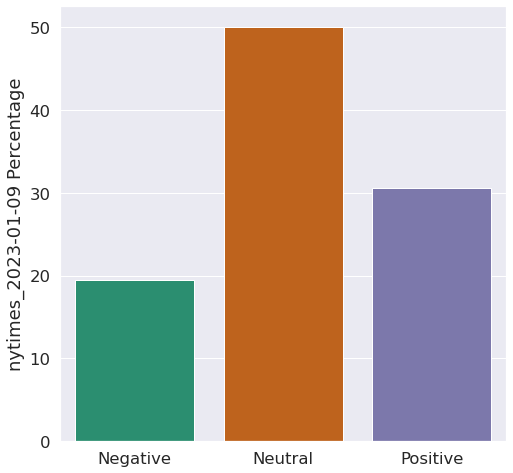

In [43]:
fig, ax = plt.subplots(figsize=(8, 8)) #create a bar graph of sentiment distributions

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel(filename[0:18] + " Percentage")

plt.savefig(filename + ".png")
plt.show()


In [10]:
textblob_sentiment=[]
for s in saved_text:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [11]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [12]:
df_textblob

,Sentence,Polarity,Subjectivity
0,Bus Crash in Senegal Kills at Least,-0.300000,0.400000
1,Global hot spots,0.125000,0.425000
2,Damar Hamlin and What CPR Can and Cannot Do,0.000000,0.000000
3,The Best Movies on Netflix Right Now,0.642857,0.417857
4,How a Mobile App Set T C U s Dream Season in ...,0.000000,0.000000
...,...,...,...
67,The Secret Power of the Minute Phone Call,-0.400000,0.700000
68,Expensive Treacherous Beautiful The Battle ...,0.175000,0.850000
69,A Lecturer Showed a Painting of the Prophet Mu...,0.000000,0.000000
70,Biden Visits Southern Border Amid Fresh Crackd...,0.150000,0.250000


In [13]:
df_textblob.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      72 non-null     object 
 1   Polarity      72 non-null     float64
 2   Subjectivity  72 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


Text(0.5, 15.440000000000012, 'Sentence Polarity (Textblob)')

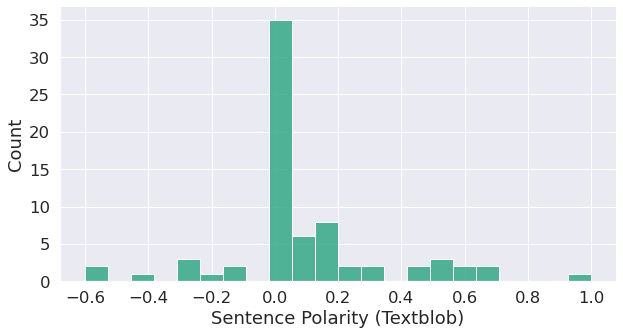

In [14]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 15.440000000000012, 'Sentence Subjectivity (Textblob)')

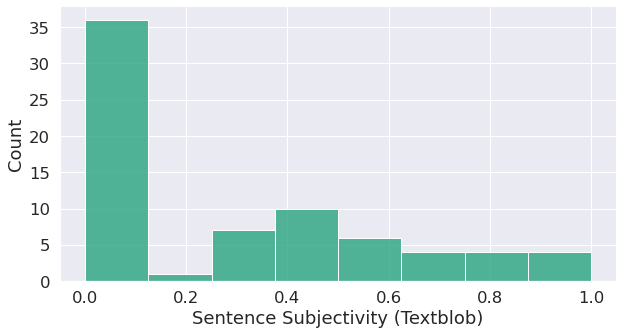

In [15]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [22]:
from nltk.tokenize import word_tokenize, RegexpTokenizer #tokenize and remove stop words from corpus
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def process_text(headlines):
    sent_tokens = []
    for headline in headlines:
        head_tokens = word_tokenize(headline)
        head_tokens = [t.lower() for t in head_tokens if t.lower() not in stop_words]
        sent_tokens.extend(head_tokens)
        print(headline)
    return sent_tokens


In [44]:
pos_lines = list(df[df.label == 1].Headline)

pos_tokens = process_text(pos_lines)

longPosTokens = [i for i in pos_tokens if len(i)> 1]
pos_freq = nltk.FreqDist(longPosTokens)


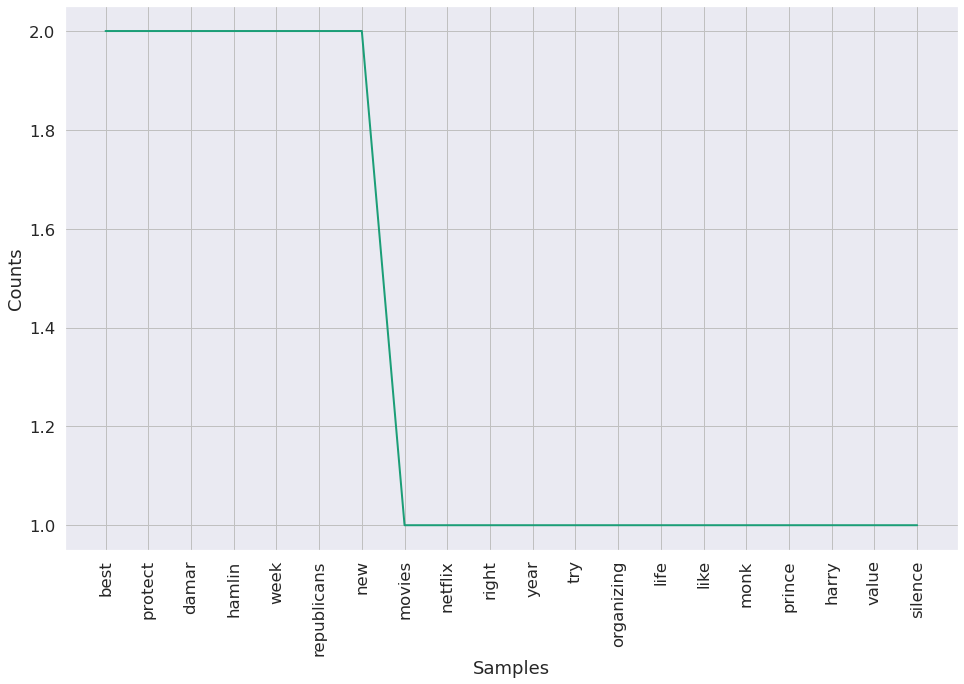

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
freq_dist = nltk.FreqDist(pos_freq)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))

freq_dist.plot(20)

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Positive Word Frequency Distribution")
plt.show()

In [ ]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Positive Word Frequency Distribution")
plt.plot(x_val, y_final)
plt.show()

In [45]:
neg_lines = list(df2[df2.label == -1].Headline)

neg_tokens = process_text(neg_lines)

longNegTokens = [i for i in neg_tokens if len(i)> 1]
neg_freq = nltk.FreqDist(longNegTokens)




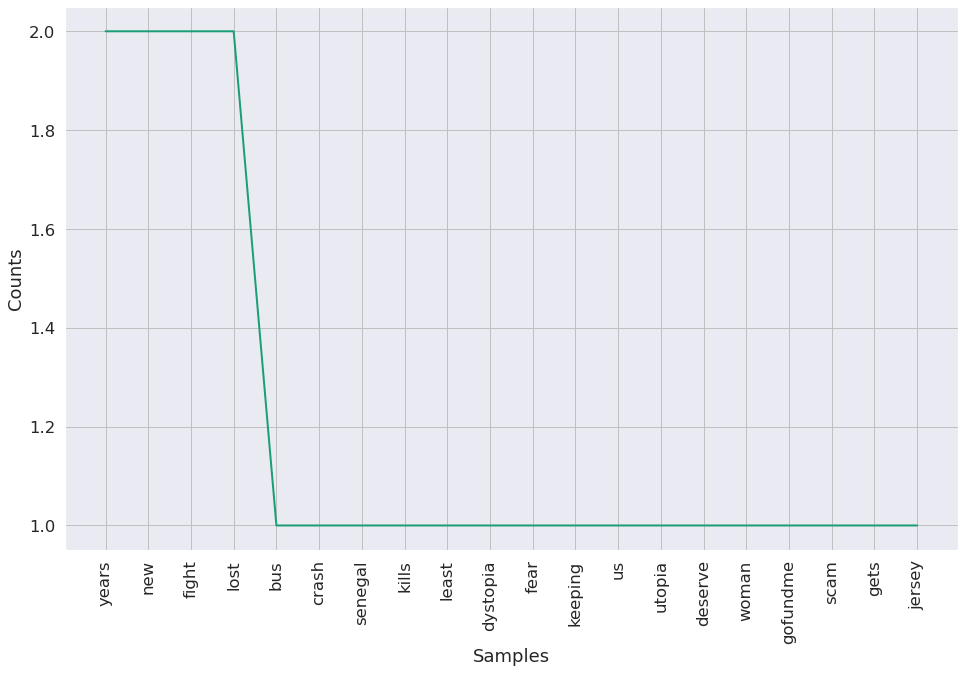

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
freq_dist = nltk.FreqDist(neg_freq)
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

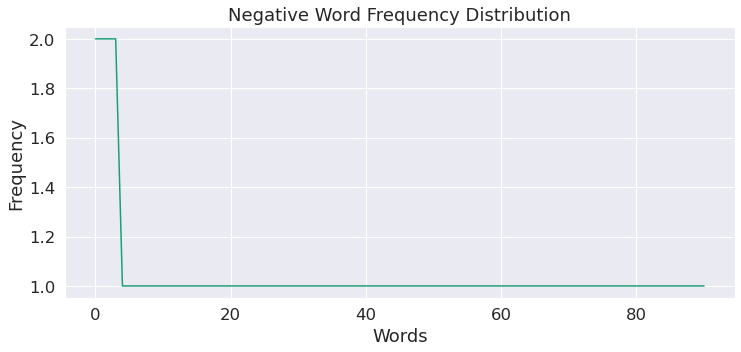

In [31]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(12,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Negative Word Frequency Distribution")
plt.show()

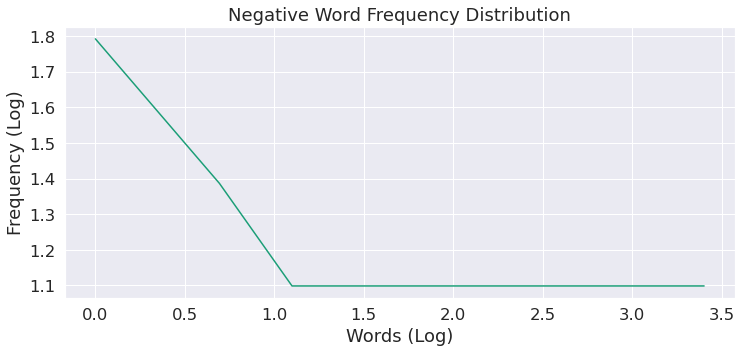

In [32]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(12,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Negative Word Frequency Distribution")
plt.plot(x_val, y_final)
plt.show()

In [33]:
from nltk.tokenize import word_tokenize, RegexpTokenizer #tokenize and remove stop words from corpus
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_tokens = []

def process_text(headlines):
    for line in headlines:
        toks = word_tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        stop_tokens.extend(toks)
    
    return stop_tokens

process_text(saved_text)


['bus',
 'crash',
 'senegal',
 'kills',
 'least',
 'global',
 'hot',
 'spots',
 'damar',
 'hamlin',
 'cpr',
 'best',
 'movies',
 'netflix',
 'right',
 'mobile',
 'app',
 'set',
 'c',
 'u',
 'dream',
 'season',
 'motion',
 'year',
 'try',
 'organizing',
 'life',
 'like',
 'monk',
 'tech',
 'companies',
 'engineers',
 'also',
 'becoming',
 'bloggers',
 'n',
 'f',
 'l',
 'playoff',
 'picture',
 'comes',
 'back',
 'belongs',
 'listen',
 'hard',
 'fork',
 'podcast',
 'dystopia',
 'fear',
 'keeping',
 'us',
 'utopia',
 'deserve',
 'prince',
 'harry',
 'value',
 'silence',
 'woman',
 'gofundme',
 'scam',
 'gets',
 'years',
 'new',
 'jersey',
 'prison',
 'bills',
 'fans',
 'catharsis',
 'real',
 'win',
 'two',
 'snowmobilers',
 'killed',
 'colorado',
 'avalanche',
 'tom',
 'brady',
 'ready',
 'discuss',
 'n',
 'f',
 'l',
 'future',
 'kentucky',
 'basketball',
 'team',
 'stinks',
 'saturday',
 'made',
 'clear',
 'importance',
 'work',
 'friends',
 'cancel',
 'plans',
 'extreme',
 'winds',
 'kno

In [34]:
from nltk.stem import WordNetLemmatizer #Lemmatize the words with stopwords removed
ls = WordNetLemmatizer()
lem_tokens = []
for t in stop_tokens:
    lemma = ls.lemmatize(t) 
    if len(lemma) > 1: #remove random single charcters from lemmatizing
        lem_tokens.append(lemma)

In [35]:
#lem_tokens #uncomment to see ouput of stemmed tokens

In [36]:
from collections import Counter     #get the top 30 words to make a data frame
my_counter = Counter(lem_tokens)
# my_counter.most_common(25)

word_freq = pd.DataFrame(my_counter.most_common(30),
                             columns=['Words', 'count'])
word_freq

,Words,count
0,new,5
1,damar,3
2,hamlin,3
3,year,3
4,harry,3
5,mccarthy,3
6,republican,3
7,best,2
8,season,2
9,life,2


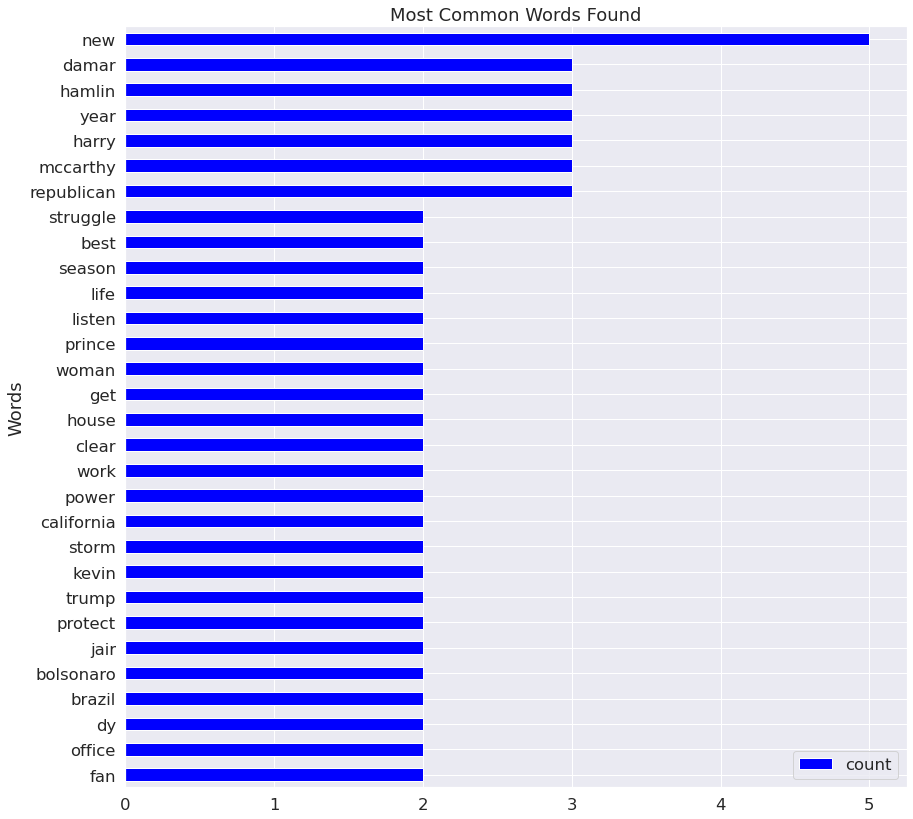

In [37]:
fig, ax = plt.subplots(figsize=(14, 14))  #make a bar graph ot the top 30 words from the data frame

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(
                                            x='Words',
                                            y='count',
                                            ax=ax,
                                            color="blue")
ax.set_title("Most Common Words Found")
plt.show()